In [ ]:
#importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import kagglehub
import zipfile
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D , MaxPooling1D , Flatten , Dense , Dropout


In [ ]:
#dowload and load the dataset

In [10]:
path = kagglehub.dataset_download("rishidamarla/heart-disease-prediction")
print("Path to dataset files:", path)
print("Files inside:", os.listdir(path))

100%|██████████| 3.41k/3.41k [00:00<00:00, 2.93MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rishidamarla/heart-disease-prediction/versions/1
Files inside: ['Heart_Disease_Prediction.csv']


In [ ]:
#finding the csv file automatically

In [11]:
for file in os.listdir(path):
  if file.endswith(".csv"):
    csv_path=os.path.join(path , file)
    break

In [ ]:
#loading csv

In [12]:
df=pd.read_csv(csv_path)
print(df.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [ ]:
#preprocessing data

In [ ]:
#seprating features and target

In [13]:
print(df.columns)

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [14]:
x=df.drop("Heart Disease", axis=1)
y=df["Heart Disease"]

In [ ]:
# Normalizing features

In [15]:
scaler= StandardScaler()
X_scaled= scaler.fit_transform(x)

In [ ]:
# Reshaping data for CNN 1D ( samples= number or rows , timestamps= number of features  , channels=1 )

In [16]:
X_cnn=np.expand_dims(X_scaled , axis=2)

In [ ]:
# Splitting dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)


In [ ]:
# Building the CNN Model

In [18]:
model=Sequential()

In [ ]:
# First convolutional layer

In [19]:
model.add(Conv1D(filters=32, kernel_size=3 , activation='relu', input_shape=(X_train.shape[1],1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# First convolutional layer: reducing output size by half

In [20]:
model.add(MaxPooling1D(pool_size=2))

In [ ]:
# Ignoring 20% of neurons to prevent overfitting

In [21]:
model.add(Dropout(0.2))

In [ ]:
#Second Convolutional Layer

In [22]:
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

In [ ]:
# Flatten and fully connected layers

In [23]:
model.add(Flatten())
model.add(Dense(16, activation='relu')) # hidden layer with 16 neuorns
model.add(Dense(1, activation='sigmoid')) # output layer

In [ ]:
# Compiling the model

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Looking the architecture of the model

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 11, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 16)          │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,969 (7.69 KB)

 Trainable params: 1,969 (7.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model

In [26]:
print(df.dtypes)


Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


In [27]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])


In [28]:
print(df.dtypes)

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object


In [29]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Split and train again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5875 - loss: 13.9702 - val_accuracy: 0.5741 - val_loss: 0.9022
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5193 - loss: 3.3127 - val_accuracy: 0.6481 - val_loss: 0.6963
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6367 - loss: 1.4707 - val_accuracy: 0.5741 - val_loss: 0.6858
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5278 - loss: 2.2985 - val_accuracy: 0.4630 - val_loss: 0.7346
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5760 - loss: 1.2635 - val_accuracy: 0.4630 - val_loss: 0.7176
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6168 - loss: 1.3409 - val_accuracy: 0.4630 - val_loss: 0.7043
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5693 - loss: 0.8623 - val_accuracy: 0.1667 - val_loss: 0.6997
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5316 - loss: 0.9057 - val_accuracy: 0.4630 - val_los

In [ ]:
# plots training vs validation accuracy (to detect overfitting)

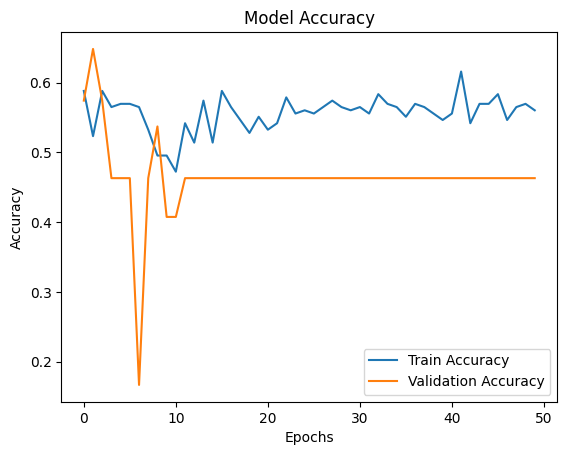

In [30]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plotting loss curves

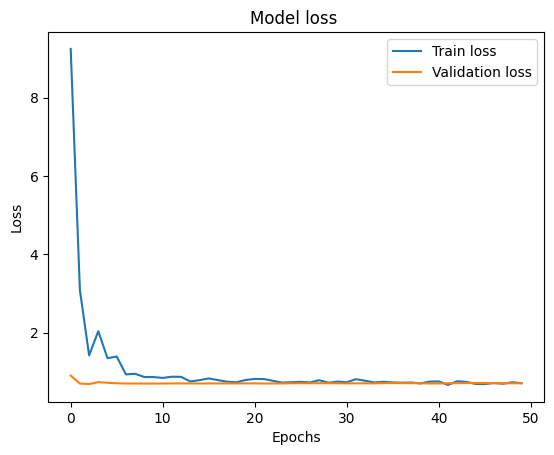

In [31]:
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Model loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Model evaluation

In [ ]:
# Test accuracy (evaluating model preformence on unseen data)

In [33]:
test_loss , test_acc= model.evaluate( X_test , y_test)
print(f"Test Accuracy:{test_acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4441 - loss: 0.7065
Test Accuracy:46.30%


In [ ]:
# Converting probabilites to 0 or 1 (binary prediction)

In [34]:
y_pred= (model.predict(X_test)> 0.5).astype("int32")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [ ]:
# Confusion Matrix & Classification Report

In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y_test , y_pred))

print("\nClassification Report:")
print(classification_report(y_test , y_pred))

Confusion Matrix:
[[25  0]
 [29  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        25
           1       0.00      0.00      0.00        29

    accuracy                           0.46        54
   macro avg       0.23      0.50      0.32        54
weighted avg       0.21      0.46      0.29        54



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
________________________________________________________________________________________________________________________________________________

In [ ]:
# The model has not learned effectively , its predicting only one class

In [ ]:
# Checking label balance

In [38]:
print(y.value_counts())

Heart Disease
0    150
1    120
Name: count, dtype: int64


In [ ]:
# Apply class balancing

In [ ]:
#importing libraries again

In [43]:
from sklearn.utils import class_weight
import numpy as np

In [ ]:
# Compute class weights

In [44]:
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(0.864), 1: np.float64(1.1868131868131868)}


In [ ]:
# Train the model again

In [45]:
history=model.fit(
    X_train , y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test , y_test),
    class_weight=class_weights
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5706 - loss: 0.7337 - val_accuracy: 0.4630 - val_loss: 0.6973
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5854 - loss: 0.6803 - val_accuracy: 0.4630 - val_loss: 0.6935
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5833 - loss: 0.7280 - val_accuracy: 0.5556 - val_loss: 0.6930
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5691 - loss: 0.7030 - val_accuracy: 0.5370 - val_loss: 0.6924
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4626 - loss: 0.7026 - val_accuracy: 0.5370 - val_loss: 0.6925
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4648 - loss: 0.7670 - val_accuracy: 0.4630 - val_loss: 0.6936
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5658 - loss: 0.6968 - val_accuracy: 0.5556 - val_loss: 0.6932
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5901 - loss: 0.7027 - val_accuracy: 0.4630 - val_los

In [ ]:
#Check data scaling (to ensure the features are normalized )

In [47]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
#Making sure the output layer is correct

In [48]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the model again

In [ ]:
# Training longer and monitor

In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
history=model.fit(
    X_train , y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test , y_test),
    class_weight=class_weights
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4305 - loss: 0.7018 - val_accuracy: 0.5370 - val_loss: 0.6885
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4282 - loss: 0.6935 - val_accuracy: 0.5370 - val_loss: 0.6878
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4399 - loss: 0.6962 - val_accuracy: 0.5370 - val_loss: 0.6749
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4338 - loss: 0.6844 - val_accuracy: 0.5556 - val_loss: 0.6804
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5673 - loss: 0.6792 - val_accuracy: 0.6667 - val_loss: 0.6899
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5382 - loss: 0.6930 - val_accuracy: 0.4259 - val_loss: 0.6938
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5732 - loss: 0.6929 - val_accuracy: 0.4259 - val_loss: 0.6937
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5502 - loss: 0.6913 - val_accuracy: 0.

In [ ]:
#Saving the model

In [54]:
model.save("heart_disease_model.h5")